In [3]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")

from utils import *

### Load experiment 1 data

In [3]:
all_car_df = load_baseline_exp()

### Preliminary Experiment Analysis

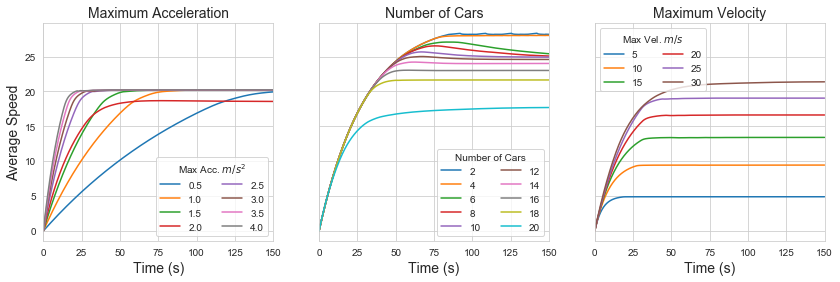

In [112]:
fig, (axs) = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

all_fe_cars = all_car_df[all_car_df.course == 'ring']
tdf2 = all_fe_cars.groupby(['acc', 'time']).mean()
tdf2.reset_index().pivot('time','acc','speed').plot(ax=axs[0])
axs[0].set_title('Maximum Acceleration', size=14)
axs[0].set_ylabel('Average Speed', size=14)
axs[0].set_xlabel('Time (s)', size=14)
axs[0].legend(title='Max Acc. $m/s^2$', ncol=2)

all_fe_cars = all_car_df[all_car_df.course == 'ring']
tdf2 = all_fe_cars.groupby(['num_cars', 'time']).mean()
tdf2.reset_index().pivot('time','num_cars','speed').plot(ax=axs[1])
axs[1].set_title('Number of Cars', size=14)
axs[1].set_xlabel('Time (s)', size=14)
axs[1].legend(title='Number of Cars', ncol=2)

leg = axs[1].get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text().split('.')[0]
    lbl.set_text(label_text)


all_fe_cars = all_car_df[all_car_df.course == 'ring']
tdf2 = all_fe_cars.groupby(['vel', 'time']).mean()
tdf2.reset_index().pivot('time','vel','speed').plot(ax=axs[2])
axs[2].set_title('Maximum Velocity', size=14)
axs[2].set_xlabel('Time (s)', size=14)
axs[2].legend(title='Max Vel. $m/s$', ncol=2)

leg = axs[2].get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text().split('.')[0]
    lbl.set_text(label_text)
    
    
plt.savefig('figures/baseline1.png', dpi=450, bbox_inches='tight')    
    


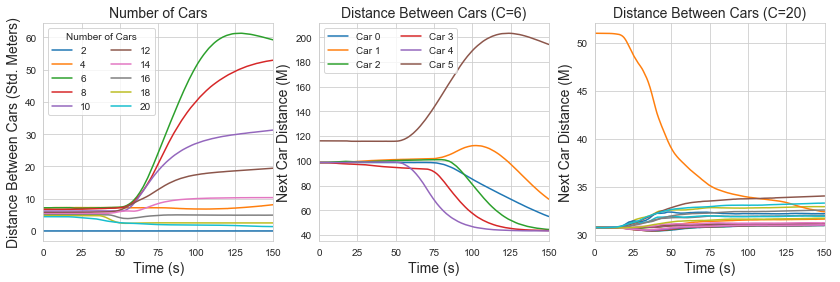

In [113]:
fig, (axs) = plt.subplots(1, 3, figsize=(14, 4), sharey=False)

all_fe_cars = all_car_df[all_car_df.course == 'ring']
tdf2 = all_fe_cars.groupby(['num_cars', 'time']).std()
tdf2.reset_index().pivot('time','num_cars','leader_dist').plot(ax=axs[0])

axs[0].set_title('Number of Cars', size=14)
axs[0].set_xlabel('Time (s)', size=14)
axs[0].set_ylabel('Distance Between Cars (Std. Meters)', size=14)
axs[0].legend(title='Number of Cars', ncol=2)

leg = axs[0].get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text().split('.')[0]
    lbl.set_text(label_text)  
    
all_fe_cars = all_car_df[(all_car_df.course == 'ring') & (all_car_df.num_cars == 6)]
tdf2 = all_fe_cars.groupby(['id', 'time']).mean()
tdf2.reset_index().pivot('time','id','leader_dist').plot(ax=axs[1])

axs[1].set_title('Distance Between Cars (C=6)', size=14)
axs[1].set_xlabel('Time (s)', size=14)
axs[1].set_ylabel('Next Car Distance (M)', size=14)
axs[1].legend(title='', ncol=2)

leg = axs[1].get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text().split('_')[1]
    lbl.set_text(f'Car {label_text}')

    
all_fe_cars = all_car_df[(all_car_df.course == 'ring') & (all_car_df.num_cars == 20)]
tdf2 = all_fe_cars.groupby(['id', 'time']).mean()
tdf2.reset_index().pivot('time','id','leader_dist').plot(ax=axs[2])
axs[2].get_legend().remove()

axs[2].set_title('Distance Between Cars (C=20)', size=14)
axs[2].set_xlabel('Time (s)', size=14)
axs[2].set_ylabel('Next Car Distance (M)', size=14)


plt.savefig('figures/baseline2.png', dpi=450, bbox_inches='tight')    


### Consesus Controller Parameter Selectoin

In [5]:
constdf = load_constants_exp()
cshape = constdf[(constdf.cv == 0.01) & (constdf.ca == 0.01)].groupby(['time']).mean()

In [ ]:
meandf = constdf.groupby(['ch', 'cv', 'ca']).mean()
stddf = constdf.groupby(['ch', 'cv', 'ca']).std()
countdf =  constdf.groupby(['ch', 'cv', 'ca']).sum()
pd.concat([meandf[['speed', 'realized_accel']],  stddf[['headway']]], axis=1)

### Baseline vs. Consensus comparisons

In [4]:
rundfs = []
for exp in glob.glob(f'baseline_report_backup/*concensus_basline*.csv'):
    rundf = pd.read_csv(exp)
    if 'num_cars_' in exp:
        experiment = 'num_cars'
    elif '_acc_' in exp:
        experiment = 'acc'
    elif '_vel_' in exp:
        experiment = 'vel'
    else:
        raise 'Invalid experiment'
        
    rundf['exp'] = experiment
    rundf['num_cars'] = int(exp.split('num_cars_')[1].split('_')[0]) if experiment == 'num_cars' else 20
    acc = float(exp.split('_acc_')[1].split('_')[0]) if experiment == 'acc' else 2
    rundf['acc'] = acc
    rundf['vel'] = float(exp.split('_vel_')[1].split('_')[0]) if experiment == 'vel' else 30
    rundf['controller'] = exp.split('_controller_')[1].split('_')[0] 
    rundfs.append(rundf)
compdf = pd.concat(rundfs)       
        
        

### Experiment 1: Congestion

In [5]:
meandf = compdf[(compdf.exp == 'num_cars')].groupby(['num_cars', 'controller']).mean()
stddf = compdf[(compdf.exp == 'num_cars')].groupby(['num_cars', 'controller']).std()
countdf = compdf[(compdf.exp == 'num_cars')].groupby(['num_cars', 'controller']).sum()
exp1 = pd.concat([meandf[['speed', 'realized_accel']], stddf[['headway']]], axis=1)

exp1 = pd.concat([meandf[['speed', 'realized_accel']],  stddf[['headway']]], axis=1)

print(exp1.to_latex(index = True, multirow = False, float_format="{:0.3f}".format))

\begin{tabular}{llrrr}
\toprule
   &           &  speed &  realized\_accel &  headway \\
num\_cars & controller &        &                 &          \\
\midrule
4  & baseline & 24.021 &           0.198 &   66.059 \\
   & consensus & 27.357 &           0.179 &  129.599 \\
8  & baseline & 23.981 &           0.198 &    7.908 \\
   & consensus & 28.271 &           0.200 &    3.131 \\
12 & baseline & 23.994 &           0.198 &    6.044 \\
   & consensus & 28.271 &           0.200 &    2.811 \\
16 & baseline & 23.979 &           0.198 &    4.983 \\
   & consensus & 28.273 &           0.200 &    2.533 \\
20 & baseline & 23.995 &           0.198 &    4.130 \\
   & consensus & 28.269 &           0.200 &    2.275 \\
\bottomrule
\end{tabular}



### Experiment 2: Desired Speed

In [6]:
meandf = compdf[(compdf.exp == 'vel')].groupby(['vel', 'controller']).mean()
stddf = compdf[(compdf.exp == 'vel')].groupby(['vel', 'controller']).std()
countdf = compdf[(compdf.exp == 'vel')].groupby(['vel', 'controller']).sum()
pd.concat([meandf[['speed', 'realized_accel']], stddf[['headway']]], axis=1)

exp2 = pd.concat([meandf[['speed', 'realized_accel']], stddf[['headway']]], axis=1)
exp2
print(exp2.to_latex(index = True, multirow = False, float_format="{:0.3f}".format))

\begin{tabular}{llrrr}
\toprule
     &           &  speed &  realized\_accel &  headway \\
vel & controller &        &                 &          \\
\midrule
10.0 & baseline &  9.327 &           0.067 &    4.900 \\
     & consensus &  9.806 &           0.067 &    2.311 \\
20.0 & baseline & 17.310 &           0.133 &    4.937 \\
     & consensus & 19.232 &           0.133 &    2.066 \\
30.0 & baseline & 23.979 &           0.198 &    4.983 \\
     & consensus & 28.273 &           0.200 &    2.533 \\
40.0 & baseline & 29.478 &           0.260 &    4.970 \\
     & consensus & 36.918 &           0.266 &    3.821 \\
\bottomrule
\end{tabular}



###  Experiment 3: Acceleration

In [7]:
meandf = compdf[(compdf.exp == 'acc')].groupby(['acc', 'controller']).mean()
stddf = compdf[(compdf.exp == 'acc')].groupby(['acc', 'controller']).std()
countdf = compdf[(compdf.exp == 'acc')].groupby(['acc', 'controller']).sum()
exp3 = pd.concat([meandf[['speed', 'realized_accel']], stddf[['headway']]], axis=1)
exp3
print(exp3.to_latex(index = True, multirow = True, float_format="{:0.3f}".format))

\begin{tabular}{llrrr}
\toprule
    &           &  speed &  realized\_accel &  headway \\
acc & controller &        &                 &          \\
\midrule
\multirow{2}{*}{1.0} & baseline & 18.903 &           0.183 &    4.938 \\
    & consensus & 26.555 &           0.200 &    4.867 \\
\cline{1-5}
\multirow{2}{*}{2.0} & baseline & 23.979 &           0.198 &    4.983 \\
    & consensus & 28.273 &           0.200 &    2.533 \\
\cline{1-5}
\multirow{2}{*}{3.0} & baseline & 25.969 &           0.200 &    4.484 \\
    & consensus & 28.846 &           0.200 &    2.052 \\
\cline{1-5}
\multirow{2}{*}{4.0} & baseline & 26.939 &           0.199 &    5.675 \\
    & consensus & 29.131 &           0.200 &    1.855 \\
\bottomrule
\end{tabular}



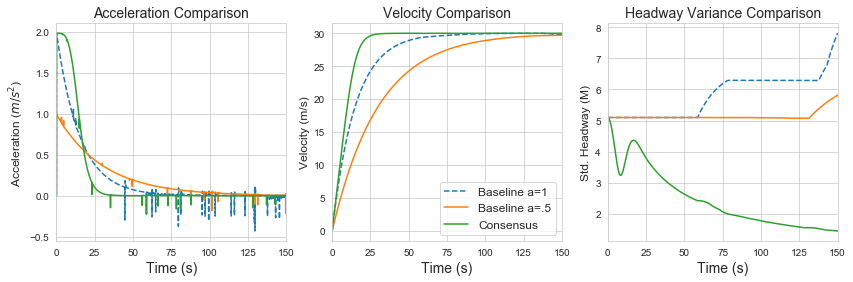

In [139]:

fig, (axs) = plt.subplots(1, 3, figsize=(14, 4), sharey=False)

plt.rc('legend',**{'fontsize':12})

meandf = compdf[(compdf.exp == 'acc') & (compdf.acc == 2)].groupby(['controller', 'time']).mean()
stddf = compdf[(compdf.exp == 'acc') & (compdf.acc == 2)].groupby(['controller', 'time']).std()

meandfb2 = compdf[(compdf.exp == 'acc') & (compdf.acc == 4)& (compdf.controller=='baseline')].groupby(['time']).mean()
stddfb2 = compdf[(compdf.exp == 'acc') & (compdf.acc == 4) & (compdf.controller=='baseline')].groupby(['time']).std()


meandfb2['realized_accel'].plot(ax=axs[0], linestyle='--')
meandf.reset_index().pivot('time','controller','realized_accel').plot(ax=axs[0])
axs[0].set_title('Acceleration Comparison', size=14)
axs[0].set_xlabel('Time (s)', size=14)
axs[0].set_ylabel('Acceleration ($m/s^2$)', size=12)
axs[0].get_legend().remove()


meandfb2['speed'].plot(ax=axs[1], linestyle='--')
meandf.reset_index().pivot('time','controller','speed').plot(ax=axs[1])

axs[1].set_title('Velocity Comparison', size=14)
axs[1].set_xlabel('Time (s)', size=14)
axs[1].set_ylabel('Velocity (m/s)', size=12)
lgd = axs[1].legend()
lgd.get_texts()[0].set_text(f'Baseline a=1')
lgd.get_texts()[1].set_text(f'Baseline a=.5')
lgd.get_texts()[2].set_text('Consensus')


stddfb2['headway'].plot(ax=axs[2], linestyle='--')
stddf.reset_index().pivot('time','controller','headway').plot(ax=axs[2])
axs[2].set_title('Headway Variance Comparison', size=14)
axs[2].set_xlabel('Time (s)', size=14)
axs[2].set_ylabel('Std. Headway (M)', size=12)
axs[2].get_legend().remove()


plt.savefig('figures/comparison.png', dpi=450, bbox_inches='tight') 

### Consensus Controller Failure modes

In [94]:
rundfs = []
for ri, exp in enumerate(glob.glob(f'exp_shared/data/*.csv')):
    rundf = pd.read_csv(exp)
    freq = 10 if int(exp.split('_interval_')[1].split('_')[0]) == 1 else .5
    cars = int(exp.split('_cars_')[1].split('.')[0])
    rundf['run'] = f'{cars} Connections, {freq} Hz Update'
    rundfs.append(rundf)
failuredf = pd.concat(rundfs)       
        

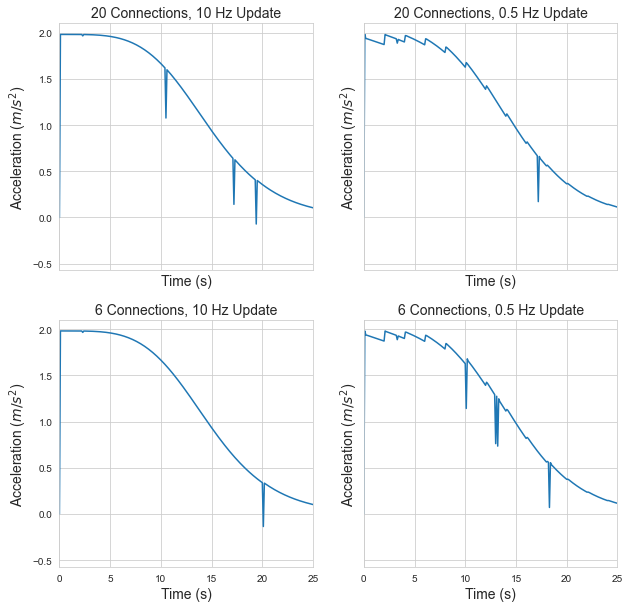

In [97]:
pix = 0
fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
for rix, run in enumerate(failuredf.run.unique()):
    plotdf = failuredf[failuredf['run'] == run].groupby(['time']).mean()
    axs[int(rix//2)][int(rix%2)].plot(plotdf.index, plotdf.realized_accel)
    axs[int(rix//2)][int(rix%2)].set_title(run, size=14)
    axs[int(rix//2)][int(rix%2)].set_xlabel('Time (s)', size=14)
    axs[int(rix//2)][int(rix%2)].set_ylabel('Acceleration ($m/s^2$)', size=14)
    axs[int(rix//2)][int(rix%2)].set_xlim([0,25])
plt.savefig('figures/failures.png', dpi=450, bbox_inches='tight') 